In [ ]:
# AGGIUNTO DROPOUT E UTILIZZO DELLA GPU
# AGGIUNTO TOKENIZER GLOVE

# Import libraries

In [ ]:
# !pip install nltk==3.7
# !pip install numpy==1.21.5
# !pip install pandas==1.3.5
# !pip install scikit_learn==1.0.2
# !pip install tensorflow==2.7.0
# !pip install torch==1.10.2
# !pip install matplotlib==3.4.3

In [ ]:
# Importing Necessary libraries
import re
import nltk
import time
import torch
import string
import numpy as np
import pandas as pd
import torch.nn as nn
# import tensorflow as tf

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import torch, platform
print("torch:", torch.__version__)
print("built with CUDA:", torch.backends.cuda.is_built())
print("torch CUDA version:", torch.version.cuda)
print("device_count:", torch.cuda.device_count())
print("python:", platform.python_version())

torch: 2.5.1+cu121
built with CUDA: True
torch CUDA version: 12.1
device_count: 1
python: 3.12.3


In [ ]:
torch.cuda.is_available()

False

In [ ]:
# import torch
# print(torch.__version__, torch.version.cuda, torch.cuda.is_available())
# print(torch.cuda.get_device_name(0))

In [ ]:
# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# from tensorflow import keras
from nltk import PorterStemmer
import torch.nn.functional as F
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.model_selection import train_test_split


---

# Reading the Data

In [ ]:
# Reading data
train_data = pd.read_excel('../SDG_dataset/sdg_17_labels_classification_dataset_4760_texts_TRAIN_2023.12.11.xlsx')
# train_data.head()

In [ ]:
# Reading data
validation_data = pd.read_excel('../SDG_dataset/sdg_17_labels_classification_dataset_1020_texts_DEV_2023.12.11.xlsx')
# validation_data.head()

In [ ]:
# Reading data
test_data = pd.read_excel('../SDG_dataset/sdg_17_labels_classification_dataset_1020_texts_TEST_2023.12.11.xlsx')
# test_data.head()

# Information About Dataset

In [ ]:
# train_data.info()

In [ ]:
# validation_data.info()

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# Selecting the needed Column

train_data = train_data[['text','sdg']]
# train_data

---

# Function to Clean the Text

In [ ]:
def clean_text(txt):
    """
    Clean and preprocess text data.
    :param txt: Input text to be cleaned
    :return: Cleaned text
    """
    # Convert text to lowercase
    txt = txt.lower()

    # Remove all special characters, including apostrophes
    txt = re.sub(r'\W', ' ', str(txt))

    # Remove punctuations
    txt = txt.translate(str.maketrans('', '', string.punctuation))

    # Remove digits
    txt = ''.join([i for i in txt if not i.isdigit()]).strip()

    # Remove single characters (e.g., "it's" -> "it s" then remove "s")
    txt = re.sub(r'\s+[a-zA-Z]\s+', ' ', txt)

    # Substitute multiple spaces with a single space
    txt = re.sub(r'\s+', ' ', txt, flags=re.I)

    # Remove links (e.g., "http://example.com" -> "")
    txt = re.sub(r"(http\S+|http)", "", txt)

    # Tokenize the text, stem words, and remove English stopwords
    txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") if word not in stopwords.words('english')])

    return txt


---

# Comparison Between Orginal Text and Processed Text

In [ ]:
print('Original Text : ',train_data['text'][1])
print('Processed Text : ',clean_text(train_data['text'][1]))

Original Text :  'League Of Legends' unveils new Arena game mode  NMESoul Fighter | Official Event Teaser - Riot Games  League of LegendsRiot Games Soul Fighter 2023 Everything You Need to Know  Riot GamesRiot Games - Official Soul Fighter Event Trailer  IGNRiot Games Reveals Cross Game Summer Event “Soul Fighter” Beginning July 20 in Wild Rift, Runeterra, and Teamfight Tactics – TouchArcade  Touch ArcadeView Full Coverage on Google News.
Processed Text :  leagu legend unveil new arena game mode nmesoul fighter offici event teaser riot game leagu legendsriot game soul fighter everyth need know riot gamesriot game offici soul fighter event trailer ignriot game reveal cross game summer event soul fighter begin juli wild rift runeterra teamfight tactic toucharcad touch arcadeview full coverag googl news


---

# Applying the Function to the Dataset

In [ ]:
train_data['text'] = train_data['text'].apply(clean_text)  # Apply the 'clean_text' function to every text in the 'text' column
validation_data['text'] = validation_data['text'].apply(clean_text)  # Apply the 'clean_text' function to every text in the 'text' column
test_data['text'] = test_data['text'].apply(clean_text)  # Apply the 'clean_text' function to every text in the 'text' column

# train_data

---

# Distribution of Classes in the dataset

In [ ]:
# train_data.sdg.value_counts()

In [ ]:
# validation_data.sdg.value_counts()

# Defining the Parameters and Tokenizer

In [ ]:
# !pip install tensorflow==2.0.0 --upgrade --force-reinstall

In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum number of words to be used (most frequent)
MAX_NB_WORDS = 4000 #2000

# Define the maximum number of words in each content
MAX_SEQUENCE_LENGTH = 600

# Define the embedding dimension
EMBEDDING_DIM = 100

# Create a Keras Tokenizer with specified parameters
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# Fit the tokenizer on the 'text' values of the 'train_data' DataFrame
tokenizer.fit_on_texts(train_data['text'].values)

# Build a word index based on the fitted tokenizer
word_index = tokenizer.word_index

# Print the number of unique tokens found
print('Found %s unique tokens.' % len(word_index))


<>:15: SyntaxWarning: invalid escape sequence '\]'
<>:15: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipykernel_8717/1962782690.py:15: SyntaxWarning: invalid escape sequence '\]'
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
2025-08-11 19:07:38.814265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754932058.850819    8717 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754932058.859562    8717 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754932058.879487    8717 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the sam

Found 14154 unique tokens.


In [ ]:
# Tokenize the 'text' values of the 'train_data' DataFrame using the fitted tokenizer
X_train = tokenizer.texts_to_sequences(train_data['text'].values)

# Pad the sequences to ensure they all have a consistent length
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)

# Print the shape of the data tensor (X)
print('Shape of data tensor:', X_train.shape[1])


Shape of data tensor: 600


In [ ]:
# Import the necessary library
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the LabelEncoder on the 'sdg' column of the 'dtrain_data' DataFrame and transform it into numerical labels
Y_train = le.fit_transform(train_data['sdg'])

# Print the shape of the transformed labels (Y_train)
print(Y_train.shape)

# Print the unique classes that were encoded
print(le.classes_)

# Print the data type of the encoded labels
Y_train.dtype


(4760,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


dtype('int64')

In [ ]:
# Tokenize the 'text' values of the 'validation_data' DataFrame using the fitted tokenizer
X_val = tokenizer.texts_to_sequences(validation_data['text'].values)

# Pad the sequences to ensure they all have a consistent length
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)

# Print the shape of the data tensor (X)
print('Shape of data tensor:', X_val.shape[1])

Shape of data tensor: 600


In [ ]:
# Import the necessary library
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
# le = LabelEncoder() # QUESTO SI FA SOLO UNA VOLTA PER IL TRAIN E POI
                      # SI USA LO STESSO PER VALIDATION E TEST

# Fit the LabelEncoder on the 'sdg' column of the 'validation_data' DataFrame and transform it into numerical labels
Y_val = le.fit_transform(validation_data['sdg'])

# Print the shape of the transformed labels (Y_val)
print(Y_val.shape)

# Print the unique classes that were encoded
print(le.classes_)

# Print the data type of the encoded labels
Y_val.dtype

(1020,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


dtype('int64')

In [ ]:
# Convert the training data into a PyTorch tensor
x_train = torch.tensor(X_train, dtype=torch.long)
y_train = torch.tensor(Y_train, dtype=torch.long)
x_cv = torch.tensor(X_val, dtype=torch.long)
y_cv = torch.tensor(Y_val, dtype=torch.long)


---

# Converting dataset to a Torch Datset

In [ ]:
# Create a TensorDataset for the training and validation data and labels
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)


In [ ]:
# Define the maximum number of features
max_features = MAX_NB_WORDS #2000

# Define the batch size for training
batch_size = 50

# Set the vocab size to the maximum number of features
vocab_size = max_features

# Create a data loader for the training data
train_dl = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

# Create a data loader for the validation data
val_dl = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

---

# Defining the Model

In [ ]:
# class LSTM(torch.nn.Module):
#     def __init__(self, vocab_size, embedding_dim, hidden_dim):
#         super().__init__()  # This line had a syntax error - missing parentheses

#         # Define the hidden dimension
#         self.hidden_dim = hidden_dim

#         # Define the embedding layer
#         self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
#         # self.drop  = nn.Dropout(p=0.2)

#         # Define the first LSTM layer
#         self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)

#         # Define the second LSTM layer
#         self.lstm1 = nn.LSTM(hidden_dim, 64, batch_first=True)

#         # Define the linear layer for classification
#         # self.linear = nn.Linear(64, 5) # MODIFICATO IN 17 PER LA CLASSIFICAZIONE DEGLI SDG!
#         self.linear = nn.Linear(64, 17)

#         # Define the softmax layer
#         # self.softmax = nn.Softmax(dim=1)

#     def forward(self, x):
#         x = self.embeddings(x)  # Pass input through the embedding layer
#         out_pack, (ht, ct) = self.lstm(x)  # Pass through the first LSTM layer
#         out_pack1, (ht, ct) = self.lstm1(out_pack)  # Pass through the second LSTM layer
#         out = self.linear(ht[-1])  # Pass through the linear layer for classification
#         # out = self.softmax(out)  # Softmax layer
#         return out


In [ ]:
class LSTM(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, dropout_rate=0.2):
        super().__init__()

        # Define the hidden dimension
        self.hidden_dim = hidden_dim

        # Define the embedding layer
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Add dropout after embeddings
        self.dropout = nn.Dropout(p=dropout_rate)

        # Define the first LSTM layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)

        # Add dropout between LSTM layers
        self.dropout_between = nn.Dropout(p=dropout_rate)

        # Define the second LSTM layer
        self.lstm1 = nn.LSTM(hidden_dim, 64, batch_first=True)

        # Define the linear layer for classification
        self.linear = nn.Linear(64, 17)

    def forward(self, x):
        # Pass input through the embedding layer
        x = self.embeddings(x)

        # Apply dropout after embeddings
        x = self.dropout(x)

        # Pass through the first LSTM layer
        out_pack, (ht, ct) = self.lstm(x)

        # Apply dropout between LSTM layers
        out_pack = self.dropout_between(out_pack)

        # Pass through the second LSTM layer
        out_pack1, (ht, ct) = self.lstm1(out_pack)

        # Pass through the linear layer for classification
        out = self.linear(ht[-1])

        return out

---

# Structure of the Model

In [ ]:
# Initialize the model with specified parameters
model = LSTM(vocab_size, 128, 64)

# Move model to GPU if available
model = model.to(device)

# Print the model architecture
print(model)


LSTM(
  (embeddings): Embedding(4000, 128, padding_idx=0)
  (dropout): Dropout(p=0.2, inplace=False)
  (lstm): LSTM(128, 64, batch_first=True)
  (dropout_between): Dropout(p=0.2, inplace=False)
  (lstm1): LSTM(64, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=17, bias=True)
)


---

# Model Tranining And Validation

In [ ]:
# Define the number of training epochs
n_epochs = 10

# Define the loss function (Cross Entropy) and optimizer (Adam)
loss_fn = nn.CrossEntropyLoss()  # Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer

# Lists to store training and validation loss
train_loss = []
valid_loss = []

# Loop over the specified number of epochs
for epoch in range(n_epochs):
    start_time = time.time()

    # Set the model in training mode
    model.train()  # Indicator for training
    avg_loss = 0.

    # Loop over the training data
    for i, (x_batch, y_batch) in enumerate(train_dl):

        # Move tensors to the configured device
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # Predict/Forward Pass
        y_pred = model(x_batch)
      # x_batch = x_batch.cuda()
      # y_batch = y_batch.cuda()

        # Compute the loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_dl)

    # Set the model in validation mode
    model.eval()  # Indicator for Validation
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv), len(le.classes_)))

    # Loop over the validation data
    for i, (x_batch, y_batch) in enumerate(val_dl):

        # Move tensors to the configured device
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(val_dl)

        # Keep/store predictions
        val_preds[i * batch_size:(i + 1) * batch_size] = F.softmax(y_pred, dim=1).cpu().numpy()
        # # Keep/store predictions
        # val_preds[i * batch_size:(i + 1) * batch_size] = F.softmax(y_pred).cpu().numpy()

        # Calculate validation accuracy
    val_accuracy = sum(val_preds.argmax(axis=1) == Y_val) / len(Y_val)

    # Append the training and validation loss
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)

    elapsed_time = time.time() - start_time
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
        epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

Epoch 1/10 	 loss=2.7826 	 val_loss=2.6395  	 val_acc=0.1843  	 time=171.22s
Epoch 2/10 	 loss=2.3929 	 val_loss=2.1649  	 val_acc=0.3000  	 time=85.00s
Epoch 3/10 	 loss=1.9401 	 val_loss=1.8736  	 val_acc=0.4059  	 time=87.13s
Epoch 4/10 	 loss=1.6104 	 val_loss=1.6227  	 val_acc=0.4931  	 time=131.80s
Epoch 5/10 	 loss=1.3444 	 val_loss=1.4473  	 val_acc=0.5559  	 time=143.42s
Epoch 6/10 	 loss=1.1602 	 val_loss=1.2999  	 val_acc=0.6137  	 time=118.50s
Epoch 7/10 	 loss=1.0092 	 val_loss=1.2381  	 val_acc=0.6431  	 time=141.10s
Epoch 8/10 	 loss=0.8899 	 val_loss=1.1868  	 val_acc=0.6686  	 time=109.27s
Epoch 9/10 	 loss=0.7783 	 val_loss=1.2151  	 val_acc=0.6627  	 time=96.40s
Epoch 10/10 	 loss=0.6941 	 val_loss=1.0989  	 val_acc=0.7216  	 time=120.83s


---

# Plotting the Loss

In [ ]:
# Function to plot the loss vs. epoch graph
def plot_graph(train_loss, valid_loss):
    epochs = len(train_loss) # Calculate the number of epochs
    plt.figure(figsize=(12, 6))
    plt.title("Train/Validation Loss") # Set the title of the graph
    plt.plot(range(1, epochs + 1), train_loss, label='Train Loss', marker='o') # Plot the training loss with markers and label
    plt.plot(range(1, epochs + 1), valid_loss, label='Validation Loss', marker='o') # Plot the validation loss with markers and label
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


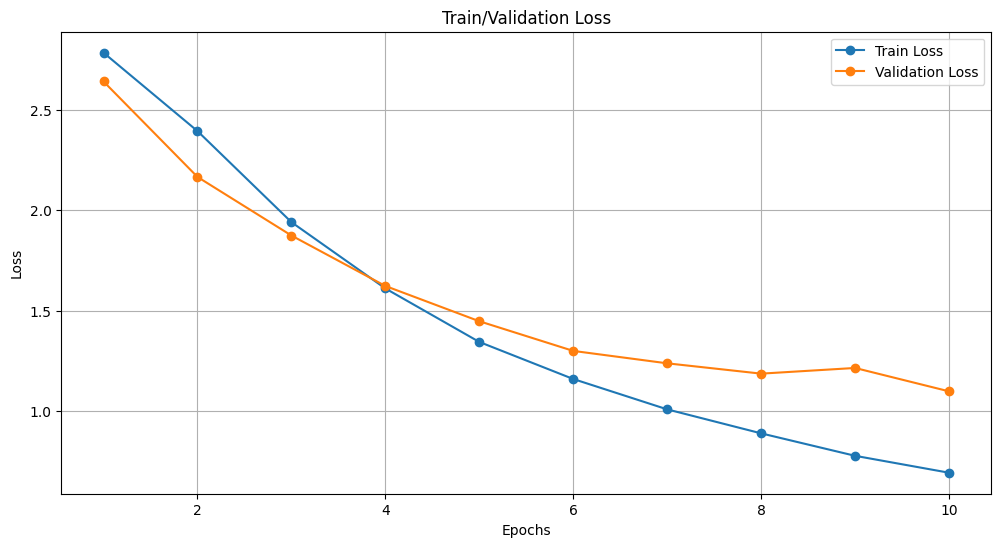

In [ ]:
plot_graph(train_loss, valid_loss)

---

# USE TRAINED MODEL ON TEST DATA

In [ ]:
# Convert to sequences
X_test = tokenizer.texts_to_sequences(test_data['text'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
# Encode labels with the SAME LabelEncoder used for train
Y_test = le.transform(test_data['sdg'])  # DO NOT fit again

In [ ]:
# Create DataLoader for the test set
x_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

test_dataset = torch.utils.data.TensorDataset(x_test_tensor, y_test_tensor)
test_dl = torch.utils.data.DataLoader(test_dataset, batch_size=50, shuffle=False,
                                      pin_memory=torch.cuda.is_available())

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for xb, yb in test_dl:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)

        outputs = model(xb)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

In [ ]:
from sklearn.metrics import classification_report

# Get readable label names as strings
target_names = [str(c) for c in le.classes_]  # convert int labels to strings

report = classification_report(all_labels, all_preds,
                                target_names=target_names,
                                digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8333    0.8333    0.8333        60
           1     0.6111    0.7333    0.6667        60
           2     0.6552    0.6333    0.6441        60
           3     0.6250    0.7500    0.6818        60
           4     0.7705    0.7833    0.7769        60
           5     0.7538    0.8167    0.7840        60
           6     0.9600    0.8000    0.8727        60
           7     0.6923    0.7500    0.7200        60
           8     0.3529    0.3000    0.3243        60
           9     0.5536    0.5167    0.5345        60
          10     0.5185    0.4667    0.4912        60
          11     0.6056    0.7167    0.6565        60
          12     0.7818    0.7167    0.7478        60
          13     0.7966    0.7833    0.7899        60
          14     0.8226    0.8500    0.8361        60
          15     0.9200    0.7667    0.8364        60
          16     0.8644    0.8500    0.8571        60

    accuracy              

In [ ]:
all_preds[:5]

[0, 0, 16, 0, 12]